In [2]:
import scipy.io.wavfile as wav
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sr, a = wav.read('modulated_noisy_audio.wav')
a 

array([-16539,   4514,   3938, ...,  13695, -16571,  15219], dtype=int16)

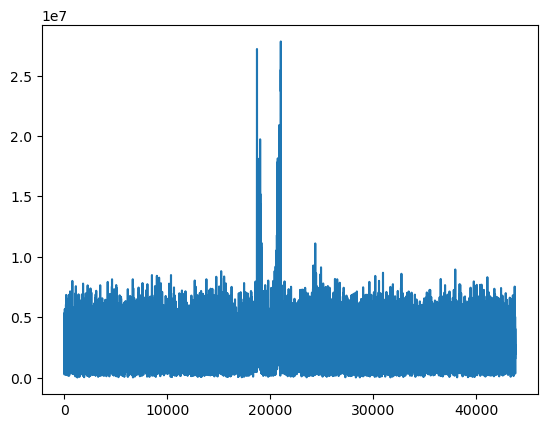

In [4]:
fhat = np.fft.fft(a)
L = np.arange(1, np.floor(len(a)/2))
plt.plot(L, np.abs(fhat[:len(L)]))

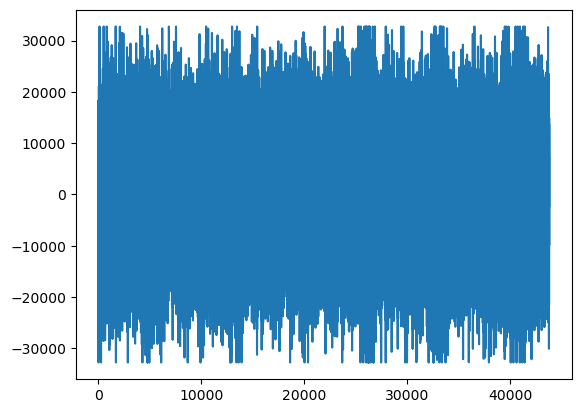

In [5]:
plt.plot(a[:len(L)])

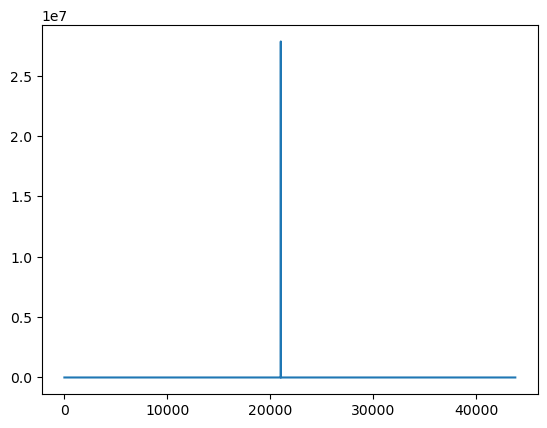

In [6]:
s = np.abs(fhat) > 2.75*1e7
fhat1 = fhat * s
plt.plot(L, np.abs(fhat1[:len(L)]))

In [7]:
np.argmax(np.abs(fhat1[:len(L)]))

21006

In [16]:
Fc = 21006
carrier = np.cos(2*np.pi*Fc*np.arange(1,len(a)+1)/sr)
a1 = a / carrier
wav.write('demodulated1.wav', sr, np.int16(a1))

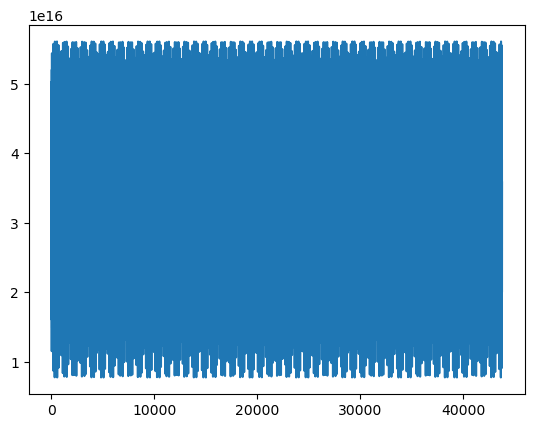

In [9]:
fhat3 = np.fft.fft(a1)
plt.plot(L, np.abs(fhat3[:len(L)]))

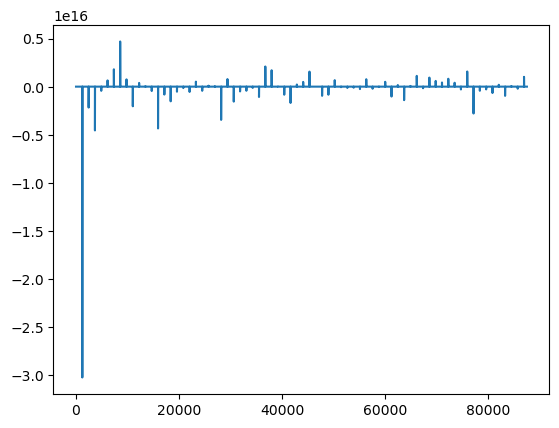

In [10]:
plt.plot(a1)

c:\Users\visha\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\visha\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


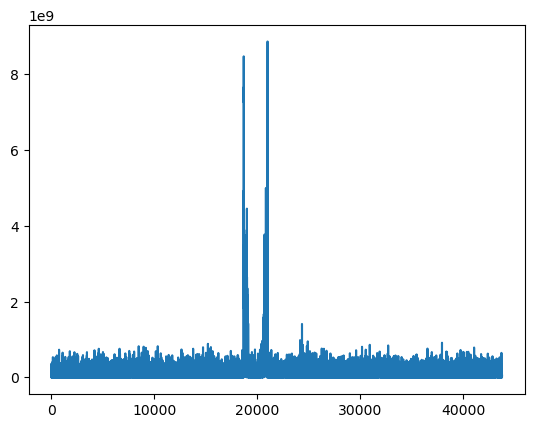

In [11]:
psd = fhat * np.conj(fhat) / len(a)
plt.plot(L, psd[:len(L)])

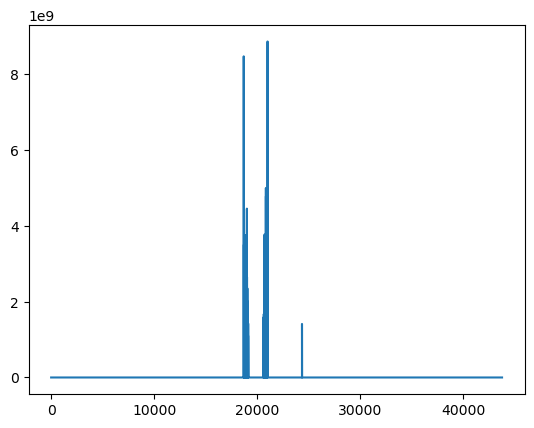

In [12]:
s1 = np.abs(psd) > 1*1e9
psd1 = psd * s1
plt.plot(L, psd1[:len(L)])

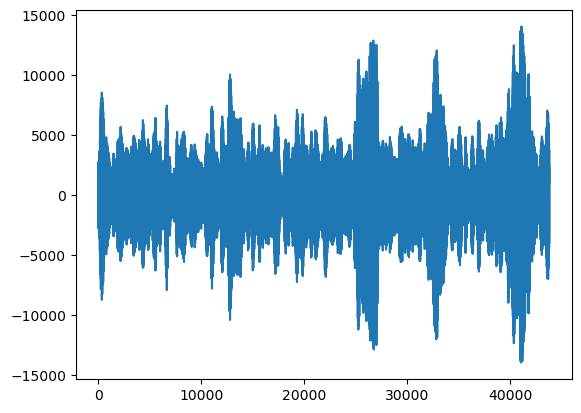

In [13]:
fhat2 = fhat * s1
f_filt = np.fft.ifft(fhat2)
plt.plot(f_filt[:len(L)])

In [14]:
wav.write('filtered.wav', sr, np.int16(f_filt))

C:\Users\visha\AppData\Local\Temp\ipykernel_19892\315839960.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  wav.write('filtered.wav', sr, np.int16(f_filt))


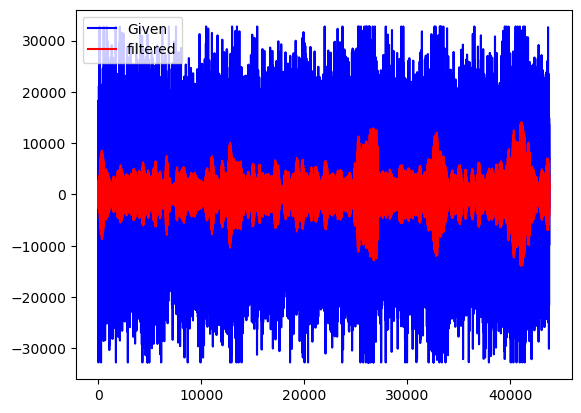

In [15]:
plt.plot(a[:len(L)], color='blue', label = 'Given')
plt.plot(f_filt[:len(L)], color='red', label = 'filtered')
plt.legend()
plt.show()